## Import libraries

In [2]:
import numpy as np
import random
import glob
import cv2
import itertools
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.utils  import to_categorical
import keras
from keras.preprocessing import image
from keras.applications import MobileNetV2
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array


## Load dataset

Since the original dataset has already splitted into training and testing dataset, so we will prepare the dataset accordingly.

### Prepare training dataset

In [3]:
folder = ['freshapples', 'freshbanana','freshguava', 'freshoranges', 'freshpomegranate','freshstrawberry','rottenapples', 'rottenbanana', 'rottenguava','rottenoranges', 'rottenpomegranate', 'rottenstrawberry'] # image folder names
cats = ['0', '1', '2', '3', '4', '5', '0', '1', '2','3', '4', '5']
image_db = []
X_train = [] # image array
y_train = [] # label array
i = 0

# interate through every folder
for f in folder:
    path_png = './dataset/train/'+ f +'/*.png'
    path_jpg = './dataset/train/'+ f +'/*.jpg'

    print('loading training dataset ' + f + '...')
    
    # iterate through every image in the folder
    for filename in itertools.chain(glob.glob(path_jpg), glob.glob(path_png)):
        # open and resize image
        im = cv2.imread(filename)
        img_resized = cv2.resize(im, (128, 128), interpolation=cv2.INTER_AREA)
        
        # append into image and label array
        image_db.append(img_resized)
        y_train.append(cats[i])
        
    i = (i + 1) % len(cats)
    
w, h = image_db[0].shape[:2]
for im in image_db:
    X_train.append(im.reshape(1, w*h, 3))
    
X_train = np.squeeze(np.array(X_train))
y_train = np.array(y_train).astype(int)

X_train = X_train.reshape(len(X_train), 128, 128, 3)
y_train = y_train.reshape(len(y_train), 1)

X_train = X_train/255.0 # normalize the pixel values to range [0, 1]

loading training dataset freshapples...
loading training dataset freshbanana...
loading training dataset freshguava...
loading training dataset freshoranges...
loading training dataset freshpomegranate...
loading training dataset freshstrawberry...
loading training dataset rottenapples...
loading training dataset rottenbanana...
loading training dataset rottenguava...
loading training dataset rottenoranges...
loading training dataset rottenpomegranate...
loading training dataset rottenstrawberry...


### Prepare testing dataset

In [4]:
folder = ['freshapples', 'freshbanana','freshguava', 'freshoranges', 'freshpomegranate','freshstrawberry','rottenapples', 'rottenbanana', 'rottenguava','rottenoranges', 'rottenpomegranate', 'rottenstrawberry'] # image folder names
cats = ['0', '1', '2', '3', '4', '5', '0', '1', '2','3', '4', '5']
image_db = []
X_test = [] # image array
y_test = [] # label array
i = 0

# interate through every folder
for f in folder:
    path_png = './dataset/train/'+ f +'/*.png'
    path_jpg = './dataset/train/'+ f +'/*.jpg'

    print('loading training dataset ' + f + '...')
    
    # iterate through every image in the folder
    for filename in itertools.chain(glob.glob(path_jpg), glob.glob(path_png)):
        # open and resize image
        im = cv2.imread(filename)
        img_resized = cv2.resize(im, (128, 128), interpolation=cv2.INTER_AREA)
        
        # append into image and label array
        image_db.append(img_resized)
        y_test.append(cats[i])
        
    i = (i + 1) % len(cats)

w, h = image_db[0].shape[:2]
for im in image_db:
    X_test.append(im.reshape(1, w*h, 3))
    
X_test = np.squeeze(np.array(X_test))
y_test = np.array(y_test).astype(int)

X_test = X_test.reshape(len(X_test), 128, 128, 3)
y_test = y_test.reshape(len(y_test), 1)

X_test = X_test/255.0 # normalize the pixel values to range [0, 1]

loading training dataset freshapples...
loading training dataset freshbanana...
loading training dataset freshguava...
loading training dataset freshoranges...
loading training dataset freshpomegranate...
loading training dataset freshstrawberry...
loading training dataset rottenapples...
loading training dataset rottenbanana...
loading training dataset rottenguava...
loading training dataset rottenoranges...
loading training dataset rottenpomegranate...
loading training dataset rottenstrawberry...


In [5]:
y_train=to_categorical(y_train)
y_train

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [6]:
y_test=to_categorical(y_test)
y_test

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [7]:
# Y_test=to_categorical(y_train)
# Y_val=np.array(y_train)

In [8]:
# y_train.shape,Y_test.shape, Y_val.shape

In [9]:
# y_test = y_test.reshape(len(y_test), 1)
# y_test = to_categorical(y_test, 6)

### Check dataset

In [10]:
print('X_train shape:', X_train.shape) # train image
print('y_train shape:', y_train.shape) # train label
print('X_test shape:', X_test.shape) # test image
print('y_test shape:', y_test.shape) # test label

X_train shape: (14401, 128, 128, 3)
y_train shape: (14401, 6)
X_test shape: (14401, 128, 128, 3)
y_test shape: (14401, 6)


In [11]:
# a function to display image
def showImage(img):
    img = np.float32(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(5,5))
    plt.imshow(img, vmin=0, vmax=255), plt.title('Sample Image')
    plt.xticks([]), plt.yticks([]), plt.show()

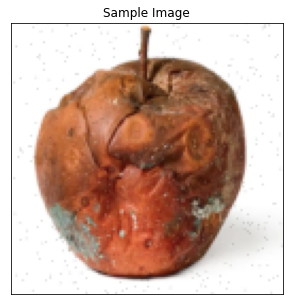

In [12]:
# randomly select an image from training images to display
idx = random.randint(0, len(X_train))
showImage(X_train[idx, :])

## CNN model

This model will be trained by using training dataset and evaluate by using testing(validation) dataset.

### Build custom CNN model

In [13]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][0]']           

In [15]:
# stop training when the validation loss is increasing for five epochs
callback = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                         patience=5, 
                                         restore_best_weights=True)

In [16]:
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_test, y_test),
                    callbacks=[callback])

Epoch 1/100
451/451 [==============================] - 103s 223ms/step - loss: 0.1615 - accuracy: 0.9429 - val_loss: 0.0540 - val_accuracy: 0.9801
Epoch 2/100
451/451 [==============================] - 81s 181ms/step - loss: 0.0391 - accuracy: 0.9859 - val_loss: 0.0109 - val_accuracy: 0.9977
Epoch 3/100
451/451 [==============================] - 82s 181ms/step - loss: 0.0293 - accuracy: 0.9894 - val_loss: 0.0254 - val_accuracy: 0.9912
Epoch 4/100
451/451 [==============================] - 82s 182ms/step - loss: 0.0228 - accuracy: 0.9920 - val_loss: 0.0374 - val_accuracy: 0.9853
Epoch 5/100
451/451 [==============================] - 81s 180ms/step - loss: 0.0248 - accuracy: 0.9921 - val_loss: 0.0243 - val_accuracy: 0.9911
Epoch 6/100
451/451 [==============================] - 82s 182ms/step - loss: 0.0186 - accuracy: 0.9935 - val_loss: 0.0657 - val_accuracy: 0.9825
Epoch 7/100
451/451 [==============================] - 83s 184ms/step - loss: 0.0075 - accuracy: 0.9977 - val_loss: 0.0046 

### Model evaluation

451/451 - 40s - loss: 6.3739e-10 - accuracy: 1.0000 - 40s/epoch - 89ms/step
Evaluation result on testing dataset : Loss = 6.373942484927397e-10, Accuracy = 1.0


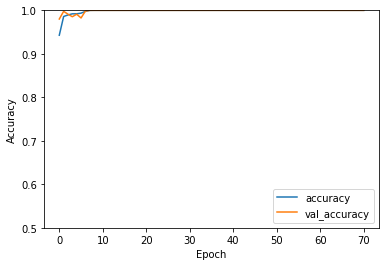

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print("Evaluation result on testing dataset : Loss = {}, Accuracy = {}".format(test_loss, test_acc))
plt.show()

In [18]:
# save model
model.save('classify_model')

INFO:tensorflow:Assets written to: classify_model\assets


INFO:tensorflow:Assets written to: classify_model\assets


In [19]:
# load model
test_model = keras.models.load_model('classify_model')

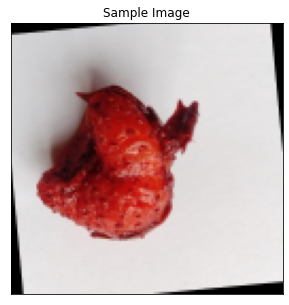

1/1 [==============================] - 0s 22ms/step
Actual class: strawberry
Predicted class: strawberry


In [45]:
# test model with random image
actual = ''
idx = np.random.randint(0, len(y_test))

# showImage is a custom function that displays the image
showImage(X_test[idx, :])

# Get the actual class name
y_test_class = np.argmax(y_test[idx])
if y_test_class == 0:
    actual = 'apples'
elif y_test_class == 1:
    actual = 'banana'
elif y_test_class == 2:
    actual = 'guava'
elif y_test_class == 3:
    actual = 'oranges'
elif y_test_class == 4:
    actual = 'pomegranate'
else:
    actual = 'strawberry'
            
# Make a prediction
y_pred = test_model.predict(X_test[idx, :].reshape(1, 128, 128, 3))
pred_class = np.argmax(y_pred)

# Get the predicted class name
if pred_class == 0:
    pred = 'apples'
elif pred_class == 1:
    pred = 'banana'
elif pred_class == 2:
    pred = 'guava'
elif pred_class == 3:
    pred = 'oranges'
elif pred_class == 4:
    pred = 'pomegranate'
else:
    pred = 'strawberry'

print('Actual class:', actual)
print('Predicted class:', pred)


In [52]:
import numpy as np
import cv2


# load an external image
image = cv2.imread('C:/Users/Lim/Desktop/oranges.jpg')

# resize image to match model input shape
image = cv2.resize(image, (128, 128))
image=img_to_array(image)
image=image/255.0
image = np.expand_dims(image, axis=0)

# make predictions using your trained model
y_pred = test_model.predict(image)

# convert prediction to one hot encoding
y_pred = np.eye(6)[np.argmax(y_pred, axis=1)[0]]

# map class index to class label
if(y_pred[0] == 1):
    pred = 'apples'
elif(y_pred[1] == 1):
    pred = 'banana'
else:
    pred = 'oranges'

print('Predicted class:', pred)
print(y_pred)


1/1 [==============================] - 0s 21ms/step
Predicted class: oranges
[0. 0. 0. 1. 0. 0.]
